# Raport z analizy danych "Wskaźniki samobójstw na lata 1985-2016"

# Mateusz Paluchowski, Języki programowania Python i R, Politechnika Gdańska, Fizyka techniczna Informatyka stosowana, Studia II stopnia I semestr

# 1. Wstęp

   Samobójstwo jest prawdopodobnie najmroczniejszą formą zakończenia ludzkiego życia. Stanowi ono nie tylko tragedię jednostki, ale tażke jej rodziny i otoczenia. W wielu społeczeństwach śmierć samobójcza bywa tematem tabu, a niedoszłych samobójców traktuje się już jako osoby "stracone", którym nie udzelana jest właściwa pomoc kliniczna.
   Celem niniejszego raportu jest analiza możliwych przyczyn występowania samobójstw w społeczeństwach świata. Ze względu na charakter dostępnych danych analiza wykonana jest w sposób kompleksowy, tj. badane są ogóle czynniki socjo-ekonomiczne, aniżeli jednostkowe uwarunkowania.


#   Dane
    
   Analizowane dane zaczerpnięte zostały z publicznie dostępnych baz (patrz Źródła). Plik master.csv (pobrany z platformy Kaggle) zawiera główny trzon poddany badaniom. Plik suicidedataextra.csv (pobrany z oficjalne strony Banku Światowego) wzbogaca bazowe dane o dodatkowe wskaźniki, które staną się istotne w toku modelowania. 

Na bazowy zestaw danych składa się:

   27820 wierszy danych,
   
   12 kolumn, które wyrażają:
   
   - country (państwo) - typ str - kraj, w którym odnotowano śmierć samobójczą,
   - year (rok) - typ int - rok, w którym odnotowano śmierć samobójczą,
   - sex (płeć) - typ str - płeć osoby zmarłej,
   - age (wiek) - typ int - wiek osoby zmarłej,
   - suicides_no (liczba śmierci samobójczych) - typ int - liczba śmierci samobójczych przypisana ze względu na pozostałe wskaźniki,
   - population (populacja) - typ int - liczba populacji przypisana ze względu na wiek oraz państwo,
   - suicidesper100k (samobójstwa na 100tys.) - typ float - liczba samobójstw na każde 100tys. osób populacji danego państwa,
   - country-year (kraj-rok) - typ str - przypisanie danemu państwu odpowiedniego roku,
   - yearlyHDI (roczne HDI) - typ float - wskaźnik HDI, jaki wystąpił w danym roku w odpowiednim państwie,
   - GDPpyear (PKB roczne) - typ str - PKB w ujęciu rocznym dla danego państwa,
   - GDPpcapita (PKB per capita) - typ int - wskaźnik PKB per capita dla danego państwa,
   - generation (pokolenie) - typ str - nazwy pokoleń sformułowanych ze względu na wiek (pojęcia socjologiczne).
   
   
   
   

In [141]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2. Przygotowanie danych do analizy i modelowania - załadowanie i czyszczenie

In [142]:
basicdata = pd.read_csv('../Raport/master.csv')

basicdata.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population','suicidesper100k',
                      'country-year', 'yearlyHDI', 'GDPpyear', 'GDPpcapita', 'generation']

basicdata.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicidesper100k country-year  yearlyHDI       GDPpyear  GDPpcapita  \
0             6.71  Albania1987        NaN  2,156,624,900         796   
1             5.19  Albania1987        NaN  2,156,624,900         796   
2             4.83  Albania1987        NaN  2,156,624,900         796   
3             4.59  Albania1987        NaN  2,156,624,900         796   
4             3.28  Albania1987        NaN  2,156,624,900         796   

        generation  
0     Generation X  
1           Silent  
2     Generation X  
3  G.I. Generation  
4          Boomers

In [143]:
basicdata.tail()

country  year     sex          age  suicides_no  population  \
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicidesper100k    country-year  yearlyHDI        GDPpyear  GDPpcapita  \
27815             2.96  Uzbekistan2014      0.675  63,067,077,179        2309   
27816             2.58  Uzbekistan2014      0.675  63,067,077,179        2309   
27817             2.17  Uzbekistan2014      0.675  63,067,077,179        2309   
27818             1.67  Uzbekistan2014      0.675  63,067,077,179        2309   
27819             1.46  Uzbekistan2014      0.675  63,067,077,179        2309   

         generation  
27815  Generation X  
27816        Silent  
27817  Generation Z  
27818  Generation Z  
27819       Boomers

In [144]:
basicdata.describe()

year   suicides_no    population  suicidesper100k    yearlyHDI  \
count  27820.000000  27820.000000  2.782000e+04     27820.000000  8364.000000   
mean    2001.258375    242.574407  1.844794e+06        12.816097     0.776601   
std        8.469055    902.047917  3.911779e+06        18.961511     0.093367   
min     1985.000000      0.000000  2.780000e+02         0.000000     0.483000   
25%     1995.000000      3.000000  9.749850e+04         0.920000     0.713000   
50%     2002.000000     25.000000  4.301500e+05         5.990000     0.779000   
75%     2008.000000    131.000000  1.486143e+06        16.620000     0.855000   
max     2016.000000  22338.000000  4.380521e+07       224.970000     0.944000   

          GDPpcapita  
count   27820.000000  
mean    16866.464414  
std     18887.576472  
min       251.000000  
25%      3447.000000  
50%      9372.000000  
75%     24874.000000  
max    126352.000000

In [145]:
basicdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          27820 non-null  object 
 1   year             27820 non-null  int64  
 2   sex              27820 non-null  object 
 3   age              27820 non-null  object 
 4   suicides_no      27820 non-null  int64  
 5   population       27820 non-null  int64  
 6   suicidesper100k  27820 non-null  float64
 7   country-year     27820 non-null  object 
 8   yearlyHDI        8364 non-null   float64
 9   GDPpyear         27820 non-null  object 
 10  GDPpcapita       27820 non-null  int64  
 11  generation       27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [146]:
#fixing and cleaning the original data  
basicdata['GDPpyear'] = basicdata.apply(lambda x: float(x['GDPpyear'].replace(',', '')), axis=1)
basicdata.sex.astype('category')

0          male
1          male
2        female
3          male
4          male
          ...  
27815    female
27816    female
27817      male
27818    female
27819    female
Name: sex, Length: 27820, dtype: category
Categories (2, object): ['female', 'male']

In [147]:
basicdata.isnull().any()

country            False
year               False
sex                False
age                False
suicides_no        False
population         False
suicidesper100k    False
country-year       False
yearlyHDI           True
GDPpyear           False
GDPpcapita         False
generation         False
dtype: bool

In [148]:
basicdata.isnull().sum()

country                0
year                   0
sex                    0
age                    0
suicides_no            0
population             0
suicidesper100k        0
country-year           0
yearlyHDI          19456
GDPpyear               0
GDPpcapita             0
generation             0
dtype: int64

In [149]:
basicdata=basicdata.drop(['yearlyHDI','country-year'],axis=1)

W ramach przygotowania podstawowych danych poddano je następującej obróbce:
 - poprawiono składnię wzkaźnika GDP per year,
 - podzielono płcie mężczyna i kobieta na dwie kategorie,
 - usunięto kolumnę country-year uznaną za nieistotną,
 - usunięto kolumnę HDI per year ze względu na brak znacznej ilości danych.

Załadowanie danych dodatkowych (patrz Wstęp i Źródła)

In [150]:
extra_data = pd.read_csv('../Raport/suicidedataextra.csv')

extra_data.columns = [
    'country', 'year', 'sex', 'age', 'suicides_no', 'population','suicidesper100k', 'country-year', 'yearlyHDI',
    'GDPpyear', 'GDPpcapita', 'generation', 'suicide%', 'Internetusers', 'Expenses', 'employeecompensation',
    'Unemployment', 'Physiciansp1000', 'Legalrights', 'Laborforcetotal', 'Lifeexpectancy', 'Mobilesubscriptionsp100',
    'Refugees', 'Selfemployed', 'electricityacess', 'secondarycompletion']

In [151]:
extra_data.head()

country  year     sex          age  suicides_no  population  \
0  Argentina  1985    male    75+ years          202      363000   
1  Argentina  1985    male  55-74 years          485     1997000   
2  Argentina  1985    male  35-54 years          414     3346300   
3  Argentina  1985  female  55-74 years          210     2304000   
4  Argentina  1985    male  25-34 years          177     2234200   

   suicidesper100k   country-year  yearlyHDI      GDPpyear  ...  Unemployment  \
0            55.65  Argentina1985      0.694  8.841667e+10  ...           0.0   
1            24.29  Argentina1985      0.694  8.841667e+10  ...           0.0   
2            12.37  Argentina1985      0.694  8.841667e+10  ...           0.0   
3             9.11  Argentina1985      0.694  8.841667e+10  ...           0.0   
4             7.92  Argentina1985      0.694  8.841667e+10  ...           0.0   

  Physiciansp1000  Legalrights  Laborforcetotal  Lifeexpectancy  \
0             0.0          0.0                0             0.0   
1             0.0          0.0                0             0.0   
2             0.0          0.0                0             0.0   
3             0.0          0.0                0             0.0   
4             0.0          0.0                0             0.0   

   Mobilesubscriptionsp100  Refugees  Selfemployed  electricityacess  \
0                      0.0       0.0           0.0               0.0   
1                      0.0       0.0           0.0               0.0   
2                      0.0       0.0           0.0               0.0   
3                      0.0       0.0           0.0               0.0   
4                      0.0       0.0           0.0               0.0   

   secondarycompletion  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 26 columns]

In [152]:
extra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15110 entries, 0 to 15109
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  15110 non-null  object 
 1   year                     15110 non-null  int64  
 2   sex                      15110 non-null  object 
 3   age                      15110 non-null  object 
 4   suicides_no              15110 non-null  int64  
 5   population               15110 non-null  int64  
 6   suicidesper100k          15110 non-null  float64
 7   country-year             15110 non-null  object 
 8   yearlyHDI                4740 non-null   float64
 9   GDPpyear                 15110 non-null  float64
 10  GDPpcapita               15110 non-null  int64  
 11  generation               15110 non-null  object 
 12  suicide%                 15110 non-null  float64
 13  Internetusers            15002 non-null  float64
 14  Expenses              

Dodatkowe dane pobrane ze strony Baku Światowego zawierają ciekawe wskaźniki, które zostaną wyjaśnione i użyte w toku analizy.

Analizowane państwa - ze względu na globalne ujęcie danych poddano badaniu dane pochodzące z tych państw, które według uprzedniej analizy będą na nią miały największy wpływ (liczba mieszkańców, całkowita liczba samobójsw, gospodarka państwa). Łącznie poddaje się analizie 40 następujących państw:

In [153]:
countrynames = [
    'Argentina',
    'Armenia',
    'Australia',
    'Austria',
    'Belgium',
    'Brazil',
    'Bulgaria',
    'Canada',
    'Chile',
    'Colombia',
    'Croatia',
    'Cuba',
    'Czech Republic',
    'Denmark',
    'Finland',
    'France',
    'Germany',
    'Greece',
    'Hungary',
    'Iceland',
    'Ireland',
    'Israel',
    'Italy',
    'Japan',
    'Mexico',
    'Netherlands',
    'New Zealand',
    'Norway',
    'Poland',
    'Portugal',
    'Romania',
    'Russian Federation',
    'South Africa',
    'Spain',
    'Sweden',
    'Switzerland',
    'Thailand', 
    'Turkmenistan',
    'Ukraine',
    'United Kingdom', 
    'United States']

Ze względu na fakt, iż dane dodatkowe zawierają statystyki na inne lata niż dane bazowe, przyjmuje się przedział lat 1995-2013 jako część wspólna dla obu zestawów.

In [154]:
df1 = extra_data.copy()
df = df1.iloc[np.where(df1.country == countrynames[0])]
for i, x in enumerate(countrynames[1:]):
    df = df.append(df1.iloc[np.where(df1.country == x)])

df = df[df.year >= 1995]
df = df[df.year <= 2013]

# 3. Analiza danych

Pobranie podstawowych informacji

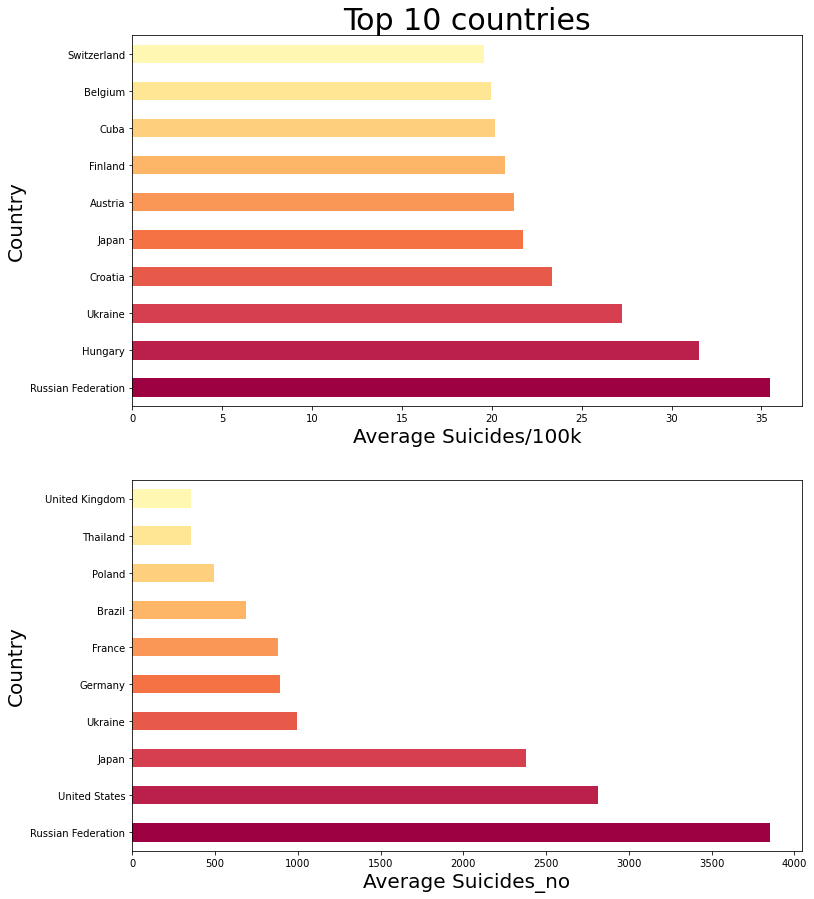

In [155]:
col = plt.cm.Spectral(np.linspace(0, 1, 20))

plt.figure(figsize=(12, 15))


plt.subplot(211)
df.groupby(['country']).suicidesper100k.mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average Suicides/100k', size=20)
plt.ylabel('Country', fontsize=20)
plt.title('Top 10 countries', fontsize=30)

plt.subplot(212)
df.groupby(['country']).suicides_no.mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average Suicides_no', size=20)
plt.ylabel('Country', fontsize=20);

W ścisłej czołówce państw ze względu na całkowitą liczbę samobójstw oraz liczbę samobójstwo na 100tys. osoób populacji dominują Federacja Rosyjska, Japonia, Ukraina (część wspólna obu tabel).

Text(0.5, 0, 'Suicides per 100K')

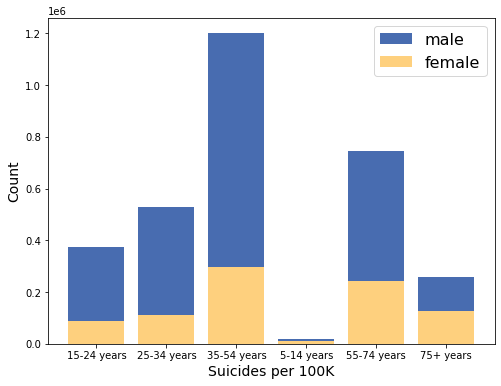

In [156]:
col = plt.cm.Spectral(np.linspace(0, 1, 20))

plt.figure(figsize=(8, 6))

agedistf = pd.DataFrame(df.groupby('sex').get_group('female').groupby('age').suicides_no.sum())

agedistm = pd.DataFrame(df.groupby('sex').get_group('male').groupby('age').suicides_no.sum())

plt.bar(agedistm.index, agedistm.suicides_no, color=col[18])
plt.bar(agedistf.index, agedistf.suicides_no, color=col[7])
plt.legend(['male', 'female'], fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Suicides per 100K', fontsize=14)

Powyższy wykres informuje o dwóch kwestiach: występowaniu samobójstw ze względu na wiek oraz stosunku płci w kategoriach wiekowych. Najwięcej samobójstw odnotowuje się w grupie wiekowej 35-54 lat, potem 55-74 lata. W każdej grupie wiekowej mężczyźni są płcią, która częściej decyduje się na samobójstwo.

Text(0, 0.5, 'Total number of suicides in the world')

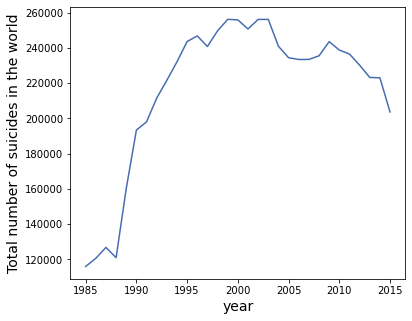

In [157]:
year = basicdata.groupby('year').year.unique()

plt.figure(figsize=(6, 5))

totalpyear = pd.DataFrame(basicdata.groupby('year').suicides_no.sum())

plt.plot(year.index[0:31], totalpyear[0:31], color=col[18])
plt.xlabel('year', fontsize=14)
plt.ylabel('Total number of suicides in the world', fontsize=14)

Wykres - "Całkowita liczba samobójstw na świecie w odpowiednich latach" - można zauważyć, że całkowita liczba samobójstw w ostatniej dekadzie (lata 10 XXI wieku) zaczęła znacząco maleć. Szczyt śmierci przypada na przełom XX i XXI wieku.

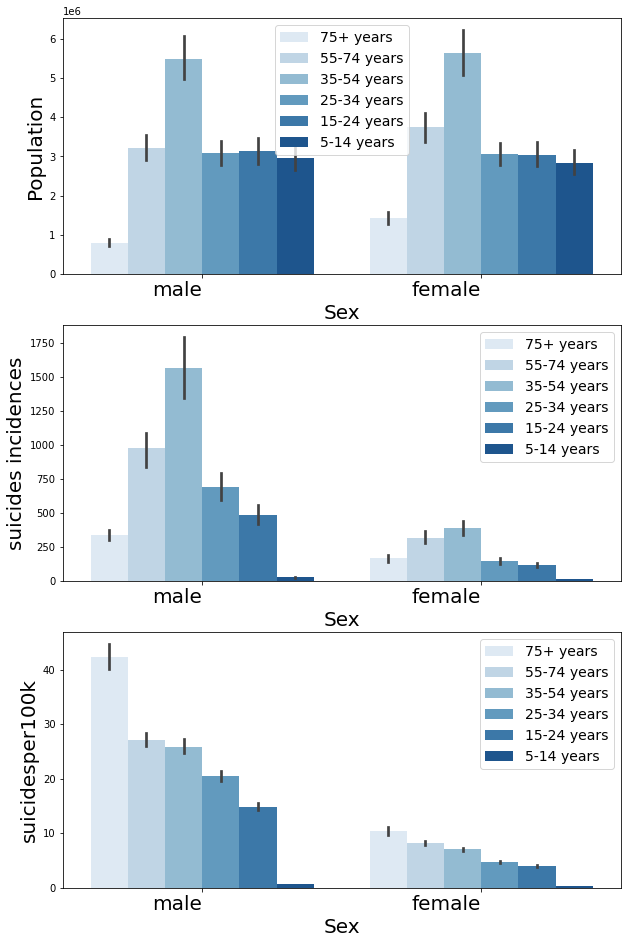

In [158]:
plt.figure(figsize=(10, 16))

plt.subplot(311)

sns.barplot(x='sex', y='population', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14, loc='best')

plt.subplot(313)

sns.barplot(x='sex', y='suicidesper100k', hue='age', data=df,palette="Blues")
plt.xticks(ha='right', fontsize=20);
plt.ylabel('suicidesper100k',fontsize=20);
plt.xlabel('Sex',fontsize=20);
plt.legend(fontsize=14);

plt.subplot(312)
sns.barplot(x='sex', y='suicides_no', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('suicides incidences', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14)

Powyższe wykresy badają wskaźniki takie jak: populacja, liczba samobójstw, samobójstwa na 100tys. osób ze względu na płeć oraz przedział wiekowy. Wsród całkowitej liczby samobóstw dominują mężczyźńi w wieku średnim, natomiast statystyka liczba samobójstw na 100tys. osób informuje, iż mężczyźni w wieku 75+ są grupą wiekową, która w jej obrębie decyduje się na samobójstwo.

Text(0, 0.5, 'count')

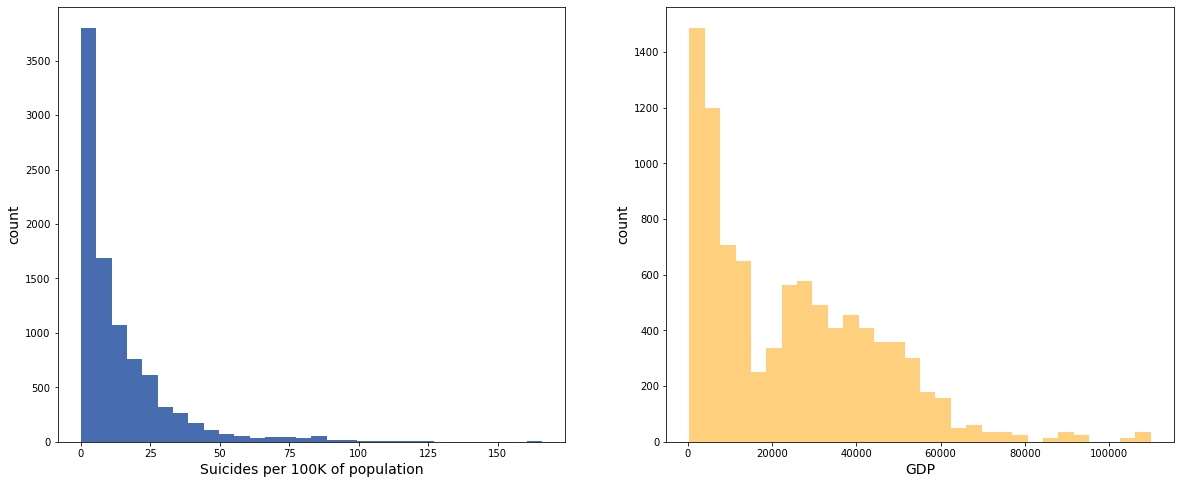

In [159]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.hist(df.suicidesper100k, bins=30, color=col[18])
plt.xlabel('Suicides per 100K of population', fontsize=14)
plt.ylabel('count', fontsize=14)

plt.subplot(122)
plt.hist(df.GDPpcapita, bins=30, color=col[7])
plt.xlabel('GDP', fontsize=14)
plt.ylabel('count', fontsize=14)

Powyższe wykresy informują, iż częściej na śmierć samobójczą decydują się osoby pochodzące z krajów o niskim PKB.

Wzbogacenie danych o dodatkowy zbiór. Czerpane są z niego takie wskaźniki, jak: poziom zatrudnienia, spodziewana długość życia, liczba uchodźców, poziom samozatrudnienia, rekompensata pracownika czy liczba użytkowników Internetu.

In [160]:
features = ['country', 'year', 'GDPpyear', 'GDPpcapita', 'employeecompensation', 'Unemployment',
            'Lifeexpectancy', 'Refugees', 'Selfemployed', 'Internetusers']

total = df[features].groupby('country').get_group(countrynames[0]).groupby('year').mean()
total['Suicides'] = df[['country', 'year', 'suicidesper100k']].groupby('country').get_group(countrynames[0]).groupby('year').sum()
total['population'] = df[['country', 'year', 'population']].groupby('country').get_group(countrynames[0]).groupby('year').sum()

total['country'] = countrynames[0]

for i, x in enumerate(countrynames[1:]):
    suicides = df[features].groupby('country').get_group(x).groupby('year').mean()
    suicides['Suicides'] = df[['country', 'year', 'suicidesper100k']].groupby('country').get_group(x).groupby('year').sum()
    total['population'] = df[['country', 'year', 'population']].groupby('country').get_group(x).groupby('year').sum()
  
    suicides['country'] = x
    total = total.append(suicides)

total.reset_index(inplace=True)
sort = True

In [161]:
totalfeatures = ['country', 'year', 'GDPpyear', 'GDPpcapita', 'employeecompensation', 'Unemployment',
                 'Lifeexpectancy', 'Refugees', 'Selfemployed', 'Internetusers', 'population']

/home/mateusz/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'GDP')

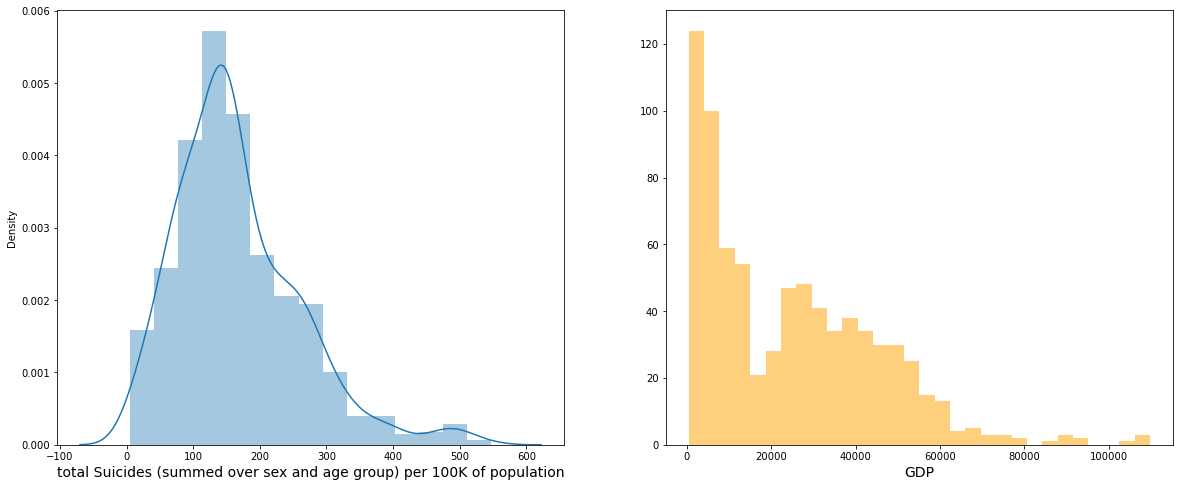

In [162]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
sns.distplot(total.Suicides, bins=15)
plt.xlabel('total Suicides (summed over sex and age group) per 100K of population', fontsize=14)

plt.subplot(122)
plt.hist(total.GDPpcapita, bins=30, color=col[7])
plt.xlabel('GDP', fontsize=14)

Poprawa poprzednich wykresów ze względu na wzbogacone dane. Można zauważyć, że liczba samobójstw na 100tys. osób populacji przybrała postać gaussowską.

Text(0.5, 0, 'year')

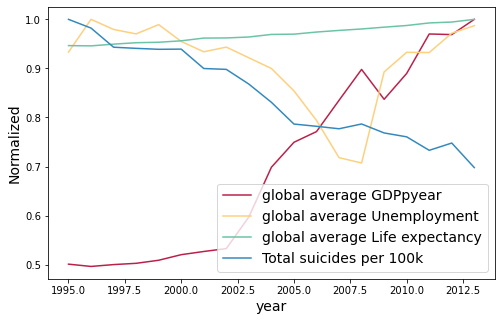

In [163]:
plt.figure(figsize=(8, 5))

suicides = df[['year', 'GDPpyear', 'Selfemployed', 'Unemployment', 'Lifeexpectancy']].groupby('year').mean()
suicides['Suicides'] = df[['country', 'year', 'suicidesper100k']].groupby('year').sum()

plt.plot(suicides.index, suicides.GDPpyear/suicides.GDPpyear.max(), color=col[1])
plt.plot(suicides.index, suicides.Unemployment/suicides.Unemployment.max(), color=col[7])
plt.plot(suicides.index, suicides.Lifeexpectancy/suicides.Lifeexpectancy.max(), color=col[15])
plt.plot(suicides.index, suicides.Suicides/suicides.Suicides.max(), color=col[17])
plt.legend(['global average GDPpyear', 'global average Unemployment', 'global average Life expectancy', 'Total suicides per 100k'], fontsize=14, loc='best')
plt.ylabel('Normalized', fontsize=14)
plt.xlabel('year', fontsize=14)

Podsumowanie części analitycznej raportu: powyższy wykres informuje jak zmieniała się liczba samobójstw na 100tys. osób populacji na tle globalnych wskaźników, takich jak: globalne średnie roczne PKB, średnia długość życia, średnie bezrobocie. Jak wcześniej stwierdzono, liczba samobóstw zaczęła znacząco maleć w drugiej dekadzie XXI wieku. Mogły mieć na to wpływ rosnące światowe PKB oraz przewidywana długóść życia (dostęp do pożywienia, opieki zdrowotnej, powszechne szczepienia itp.).

# 4. Wyznaczenie korelacji

In [164]:
corr = total.corr()

# Generate a mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.2, cbar_kws={"shrink": 0.8});

Wyznaczono ogólne korelacje między przyjętymi wskaźnikami (zaczęrpniętymi z obu zestawów bazowego oraz dodatkowego). Jako silnie skorelowane dominują: wzrost populacji w postępujących latach, liczba Internautów ze względu na populację, rok, roczne PKB państwa, długość życia. Mocno skorelowanie są także długość życia i PKB per capita państwa, samozatrudnienie - wynagrodzenie, uchodźcy - bezrobocie. Biorąc pod uwagę wskaźnik samobójstw, występuje pewna korelacja między liczbą samobójstw a uchodźcami.

# 5. Przygotowanie danych do modelowania

Przygotowanie wskaźników do modelowania - zastąpienie pustych wartośći właściwymi.

In [165]:
# Cleaning the data, replacing null values with appropriate replacements

total.Internetusers.fillna(total.Internetusers. min(), inplace=True)
total.Refugees.fillna(8, inplace=True)
total.employeecompensation.fillna(total.employeecompensation.mean(), inplace=True)
total.population.fillna(total.population.mean(), inplace=True)

 # Klasyfikacja binarna

Zdecydowałem się na binarną klasyfikację danych dotyczących samobójstw, przypisując klasy ryzyka na podstawie częstości samobójstw na 100tys. osób populacji jako wysokie/niskie ryzyko samobójstwa. Dodanie dodatkowej kolumny do  ramki danych jako „ryzyko”. 

In [166]:
total['risk'] = total.Suicides.copy()

total['risk'] = np.where(total.risk < total.Suicides.mean(), 0, 1)

/home/mateusz/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mateusz/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Suicides')

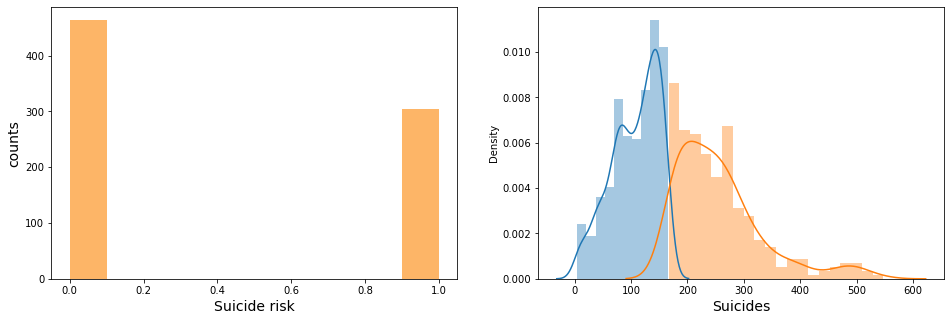

In [167]:
plt.figure(figsize=(16, 5))
plt.subplot(121)
plt.hist(total.risk, color=col[6])
plt.ylabel('counts', fontsize=14)
plt.xlabel('Suicide risk', fontsize=14)

plt.subplot(122)
sns.distplot(total.Suicides[total.risk == 0], bins=10)
sns.distplot(total.Suicides[total.risk == 1], bins=20)  
plt.xlabel('Suicides', fontsize=14)

Przypisanie etykiety państwom.

In [168]:
# Label encoding countries

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

total.country = le.fit_transform(total.country)  # Alphabetic order [0:40]
total.country.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40])

In [169]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=4)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (576, 11) (576,)
Test set: (192, 11) (192,)


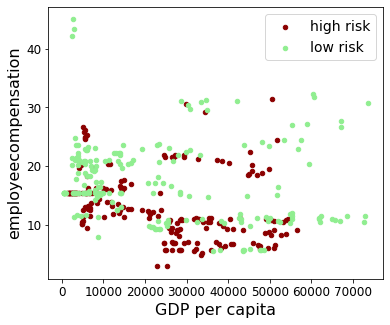

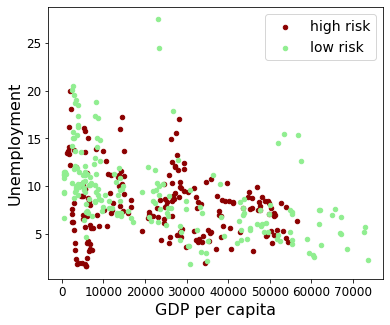

In [170]:
ax1 = total[total['risk'] == 1][0:200].plot(kind='scatter', x='GDPpcapita', y='employeecompensation', color='DarkRed',
                                            label='high risk', figsize=(6, 5), fontsize=12)
total[total['risk'] == 0][0:200].plot(kind='scatter', x='GDPpcapita', y='employeecompensation', color='LightGreen',
                                      label='low risk', ax=ax1)

plt.ylabel('employeecompensation', fontsize=16)
plt.xlabel('GDP per capita', fontsize=16)
plt.legend(fontsize=14)


ax1 = total[total['risk'] == 1][0:200].plot(kind='scatter', x='Lifeexpectancy', y='Selfemployed', color='DarkRed',
                                            label='high risk', figsize=(6, 5), fontsize=12)
total[total['risk'] == 0][0:200].plot(kind='scatter', x='Lifeexpectancy', y='Selfemployed', color='LightGreen',
                                      label='low risk', ax=ax1);

plt.ylabel('Selfemployed', fontsize=16)
plt.xlabel('Lifeexpectancy', fontsize=16)
plt.legend(fontsize=14)


ax1 = total[total['risk'] == 1][0:200].plot(kind='scatter', x='GDPpcapita', y='Unemployment', color='DarkRed',
                                            label='high risk', figsize=(6, 5), fontsize=12);
total[total['risk'] == 0][0:200].plot(kind='scatter', x='GDPpcapita', y='Unemployment', color='LightGreen',
                                     label='low risk', ax=ax1);

plt.ylabel('Unemployment', fontsize=16)
plt.xlabel('GDP per capita', fontsize=16);
plt.legend(fontsize=14);

/home/mateusz/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mateusz/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mateusz/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

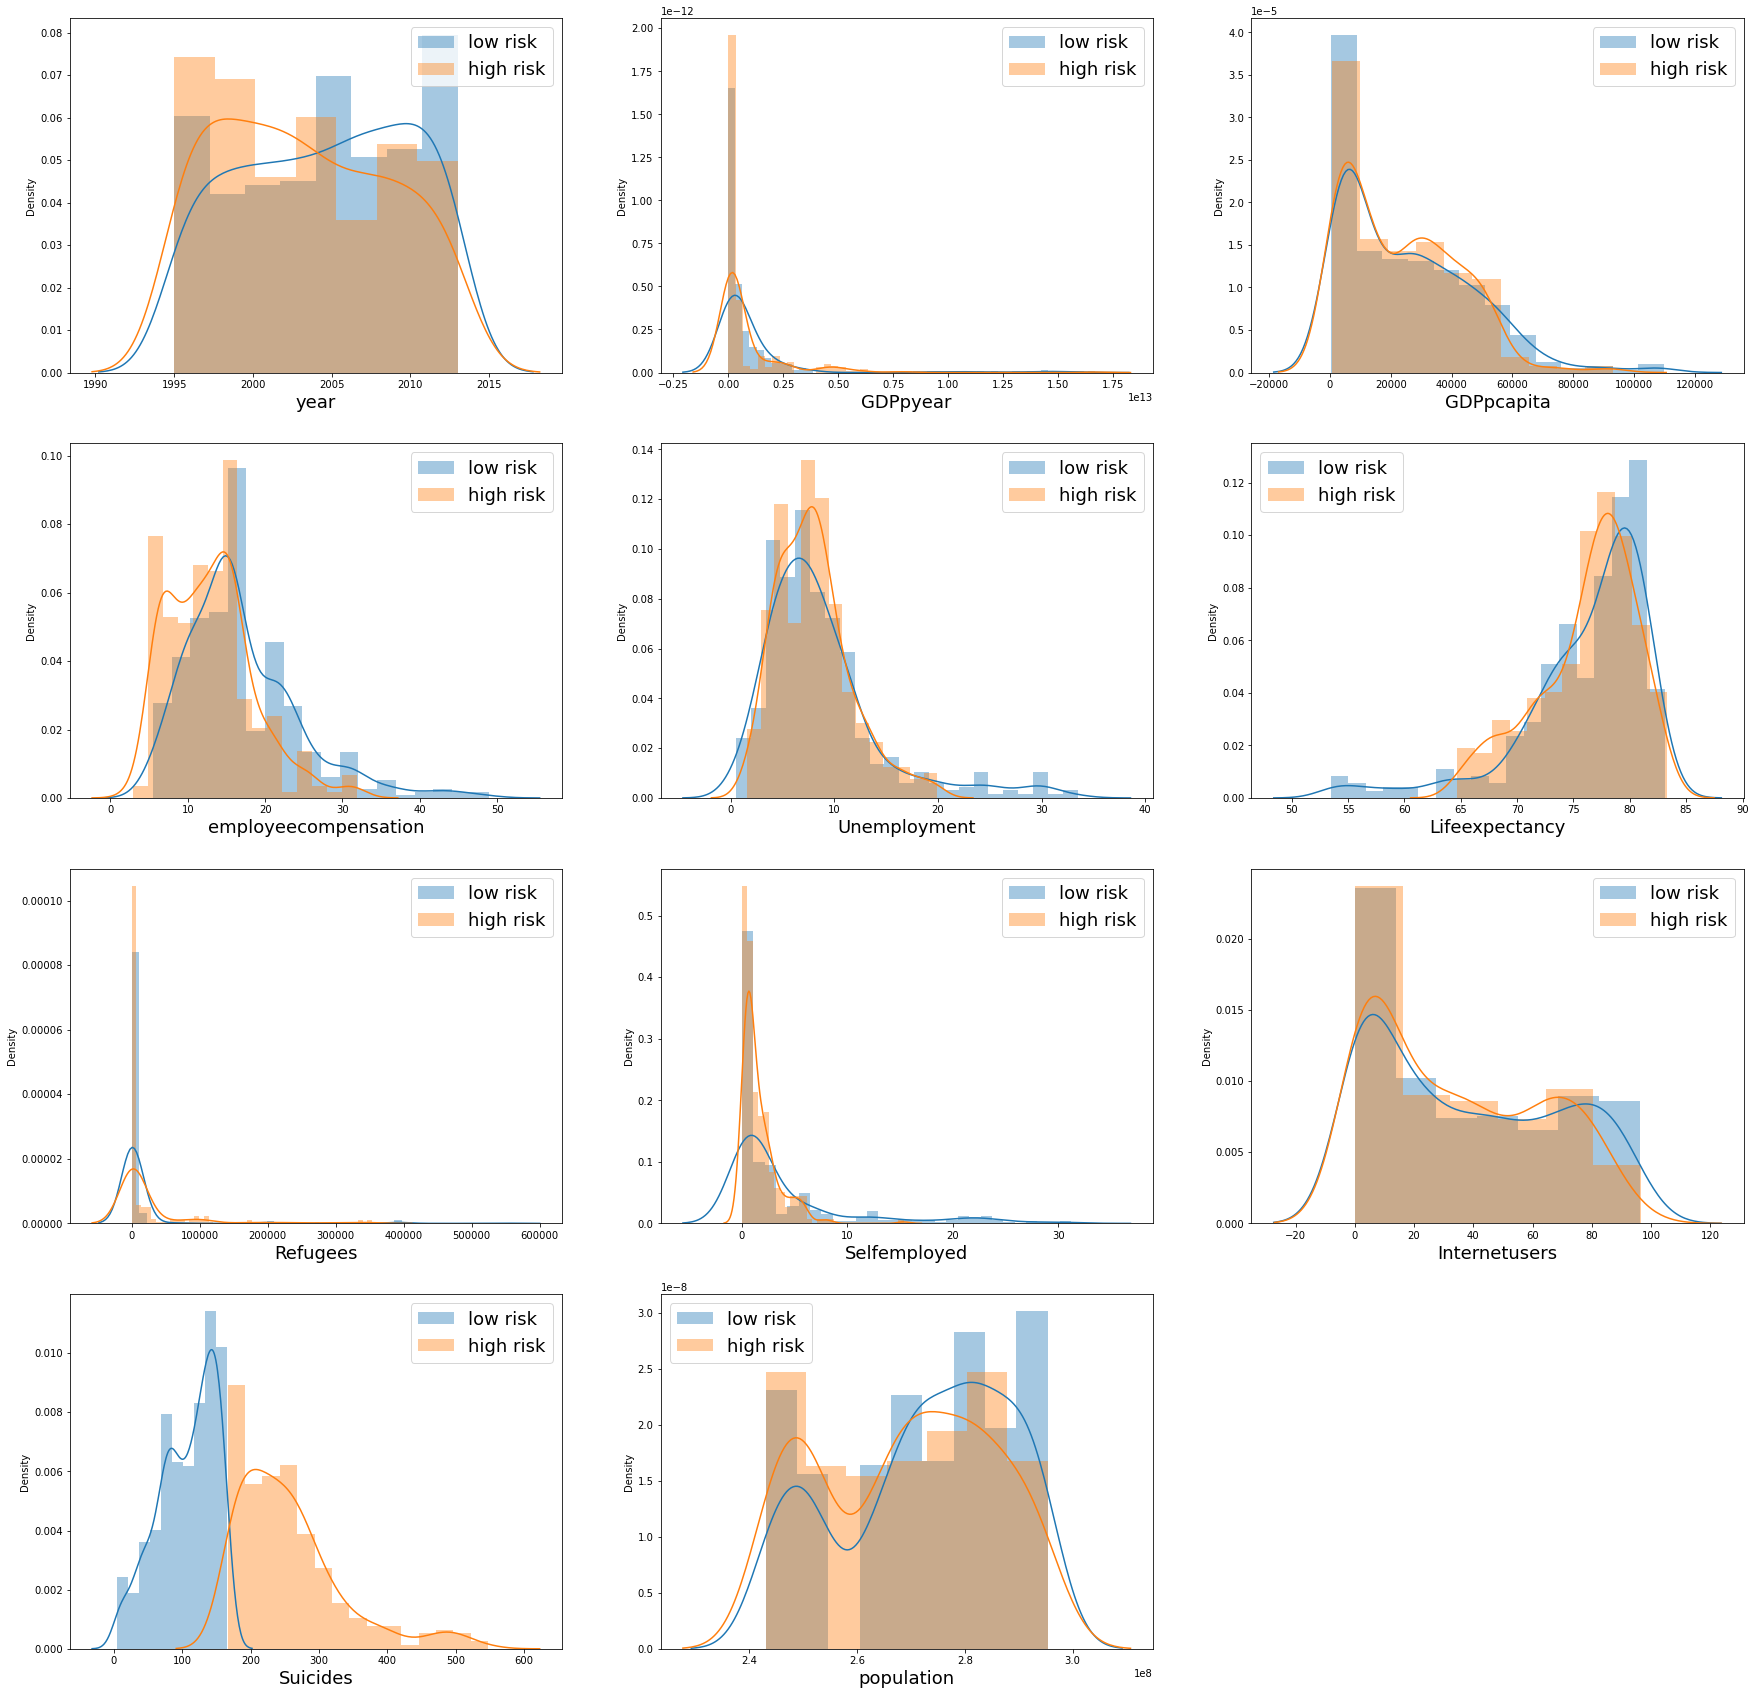

In [171]:
fig = plt.figure(figsize=(30, 30))

j = 0
for i, x in enumerate(total.columns[0:11]):
    plt.subplot(4, 3, j+1)
    j += 1
    sns.distplot(total[x][total.risk == 0], label='low risk')
    sns.distplot(total[x][total.risk == 1], label='high risk')       
    plt.legend(loc='best', fontsize=18)  
    plt.xlabel(x, fontsize=18)

Powyższe wykresy (oba ploty) stanowią podsumowanie poddania wskaźnika liczby samobójstw na 100tys. osób populacji klasyfikacji binarnej. Pierwsze z nich informują o takiej korelacji wysokiej liczby samobójstw z przyczynami jak: niskie PKB per capita, niskie samozatrutnienie, wysokie bezrobocie. Drugi zestaw wykresów przyznaje pewne skorelowanie występowania samobójstw z takimi czynnikami jak: wysoka populacja państwa, występowanie uchodźców w państwie, mała liczba użytkowników Internetu, niskie wynagrodzenia, nieskie roczne PKB. Powtórzone jest stwiedznie faktu, iż całkowita liczba samobójstw maleje w ostatnich latach.

# 6. Trening modeli

# Pierwszym realizowanym modelem jest regresja logistyczna.

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, classification_report


LR = LogisticRegression(C=0.001, solver='liblinear').fit(X_train, y_train)

yLRhat = LR.predict(X_test)

yLRhat_prob = LR.predict_proba(X_test)


print('precision_recall_fscore_support', precision_recall_fscore_support(y_test, yLRhat, average='weighted'))

cm = confusion_matrix(y_test, yLRhat)
print('\n confusion matrix \n', cm)

print('classification report for Logistic Regression\n', classification_report(y_test, yLRhat))

precision_recall_fscore_support (0.7241902834008097, 0.71875, 0.7207692307692307, None)

 confusion matrix 
 [[90 30]
 [24 48]]
classification report for Logistic Regression
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       120
           1       0.62      0.67      0.64        72

    accuracy                           0.72       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.72      0.72      0.72       192



Jak się spodziewano, ze względu na swój probalilistyczny charakter, model regresji logistycznej wobec przygotowanego zestawu danych cechuje się całkem satysfakcjonującą skutecznością przewidywań rzędu 0.72 średniej ważonej wskaźnika skuteczności F1.

# Głównym modelem przygotowanym na potrzby badań jest las losowy.

In [173]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=20, max_depth=10, min_samples_split=2, min_samples_leaf=5,
                                       max_leaf_nodes=20, max_features=len(totalfeatures)) 

random_forest.fit(X_train, y_train)

yrfhat = random_forest.predict(X_test)
feat_importance = random_forest.feature_importances_
rffeat_importance = pd.DataFrame([totalfeatures, random_forest.feature_importances_]).T

print('******************Random forest classifier**************')
print('Accuracy on training data', random_forest.score(X_train, y_train))
print('Accuracy on test data', random_forest.score(X_test, y_test))
print('CM\n', confusion_matrix(y_test, yrfhat))
print('Classification report for random forest\n', classification_report(y_test, yrfhat))
print(rffeat_importance.sort_values(by=1, ascending=False))

******************Random forest classifier**************
Accuracy on training data 0.9565972222222222
Accuracy on test data 0.9375
CM
 [[112   8]
 [  4  68]]
Classification report for random forest
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       120
           1       0.89      0.94      0.92        72

    accuracy                           0.94       192
   macro avg       0.93      0.94      0.93       192
weighted avg       0.94      0.94      0.94       192

                       0         1
0                country  0.187283
8           Selfemployed  0.187099
4   employeecompensation  0.186487
7               Refugees  0.171732
2               GDPpyear  0.113443
3             GDPpcapita   0.05368
5           Unemployment  0.049689
6         Lifeexpectancy  0.024107
9          Internetusers   0.01697
10            population  0.005791
1                   year  0.003718


Model losowego lasu wykazuje wysoką skuteczność klasyfikacji rzędu 0.94 średniej ważonej wskaźnika F1. Tabelka przewidywanych korelacji zostanie opisana poniżej.

# Poddanie modelu walidacji krzyżowej w celu zminimalizowania nadmiernego dopasowania. 

In [174]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
rfscores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')

rfpredictions = cross_val_predict(random_forest, X_train, y_train)

print('CM for random forest with cross validation\n', confusion_matrix(y_train, rfpredictions))
print('classification report for random forest with CV \n', classification_report(y_train, rfpredictions))



CM for random forest with cross validation
 [[321  23]
 [ 30 202]]
classification report for random forest with CV 
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       344
           1       0.90      0.87      0.88       232

    accuracy                           0.91       576
   macro avg       0.91      0.90      0.90       576
weighted avg       0.91      0.91      0.91       576



Poddanie modelu walidacji krzyżowej pozwoliło skorygować charakterystyki klasyfikacji modelu. Obecnie całkowita skuteczność modelu lasu loswego wynosi według średniej ważonej wskaźnika F1 0.91.

Feature importance results for the model
random forest accuracy score (5-fold cross validation)= 0.9165817091454274 +/- 0.059021463857827014


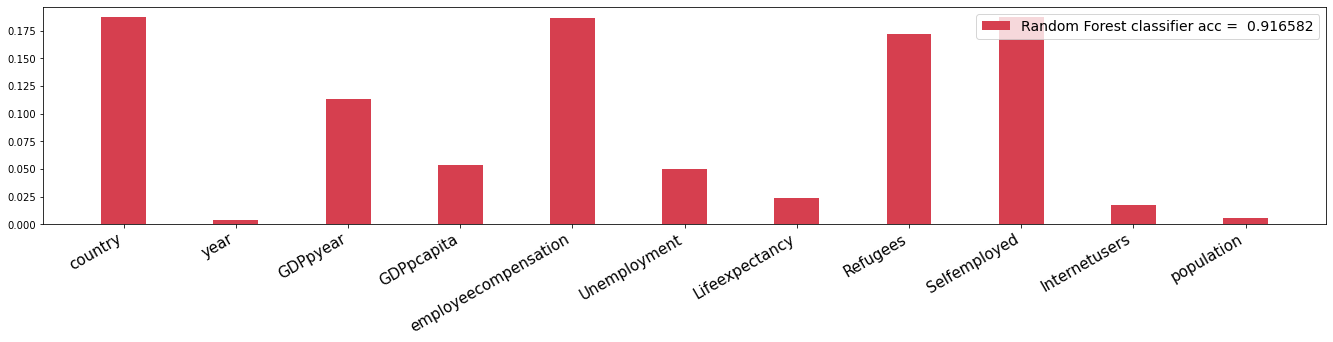

In [175]:
print('Feature importance results for the model')
print('random forest accuracy score (5-fold cross validation)=', rfscores.mean(), '+/-', rfscores.std()*2)

plt.figure(figsize=(23, 4))
plt.bar(rffeat_importance[0], rffeat_importance[1], color=col[2], width=0.4,)
plt.xticks(ha='right', rotation=30, fontsize=15)
plt.legend(['Random Forest classifier acc = % f'% rfscores.mean()], fontsize=14)

Całkowity wynik skuteczności klasyfikacji dla modelu lasu losowego poddanego walidacji krzyżowej wynosi około 0.91. Model klasyfikacji lasu losowego wskazuje silne skorelowanie możliwego występowania samobójstw z takimi wskaźnikami jak: państwo (ogólnie pojęte), roczny PKB państwa, samozatrudnienie, liczba uchodźców, wynagordzenie pracownika. Wyniki predykcji modelu pokrywają się z poprzednimi wnioskami, które dotyczyły możliwych przyczyn śmierci samobójczych (patrz rozdział Analiza oraz Korelacja). 

# 7. Podsumowanie

# Niniejszy raport przedstawia analizę zestawu danych "Wskaźniki samobójstw na lata 1985-2016" pobranego z publicznie dostępnej bazy. W toku prac opisano charakter danych, poddano je obróbce oraz załadowano dodatkowy zestaw pobrany z bazy Banku Światowego wzbogacając zestaw bazowy o dodatkowe wskaźniki. Następnie przeprowadzono analizę danych. Wnioski z przeprowadzonych analiz informują o pewnej korelacji występowania samobójstw w danej populacji z PKB danego państwa, stopniem bezrobocia, wynagrodzeniem pracowników czy liczbą uchodźców. Grupą, która najczęściej decyduje się na samobójstwo są mężczyźni w wieku średnim. Przygotowane modele klasyfikacji uczenia maszynowego wykazały się satysfakcjonującą skutecznością przewidywań. Wyniki przewidywań w dużym stopniu pokrywają się z wnioskami analiz. Moim zdaniem, gównym stwierdzeniem podsumowującym niniejszą pracę oraz raport jest fakt, iż całkowita liczba samobójstw na świecie stopniowo maleje z biegiem lat. Mogą mieć na to wpływ takie czynniki jak: bogacienie się państw, rosnący dostęp do publicznej służby zdrowia, wzrost wyedukowania społeczeńcztw czy rosnąca przewidywana długość życia.

  # 8. Żródła:

    https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016
    https://datacatalog.worldbank.org/search/dataset/0037712
    
   United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

   World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

   [Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

   World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/ 